# --- Load the Dataset and perform EDA ---

In the following session, please complete:

1.   Load the dataset as a Pandas Dataframe (Dataset: Please download the train.csv from https://www.kaggle.com/competitions/titanic/data?select=train.csv)
2.   Display first 5 rows of the dataset
3.   Perform descriptive statistics of the data
4.   Get information of the data types and potential missing value status
5.   Use appropriate visulaization technique to visualize each column (excluding PassengerID)



In [43]:
# 1) preparations for EDA and modeling
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("/content/train.csv")

In [11]:
# 2) First 5 rows of the data
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 3)Summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#4) NA info and types
data.info()
data.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


Some missing values above in Age, Cabin, and embarked. Cabin has the most missing

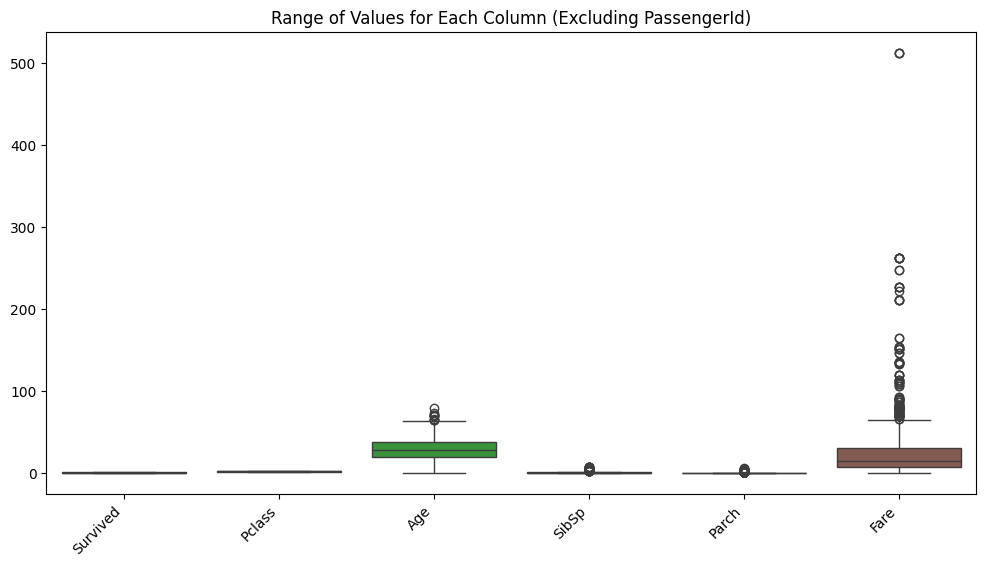

In [15]:

# 5) Total Visualization
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'PassengerId'] # Exclude 'PassengerId'

# Create the box plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Range of Values for Each Column (Excluding PassengerId)')
plt.show()

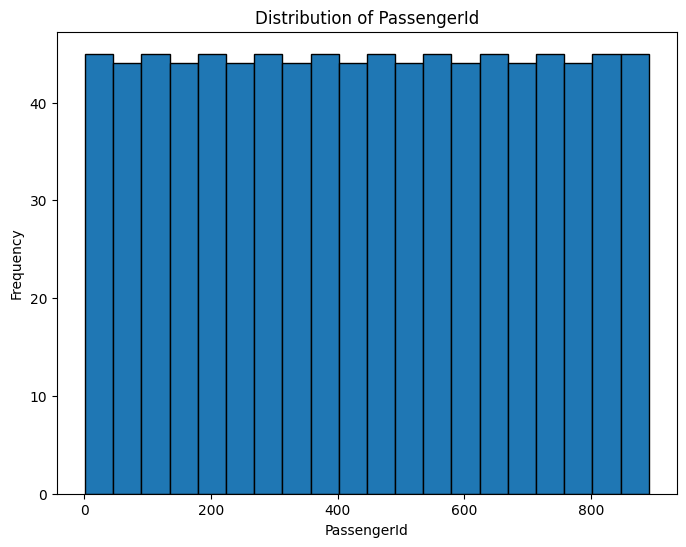

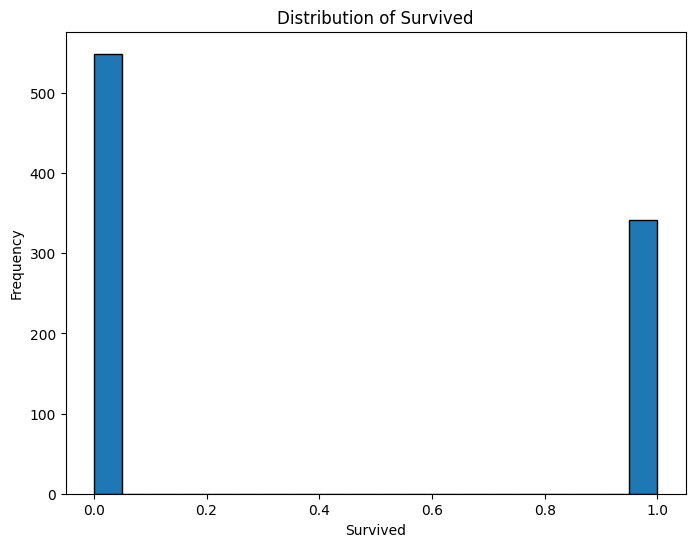

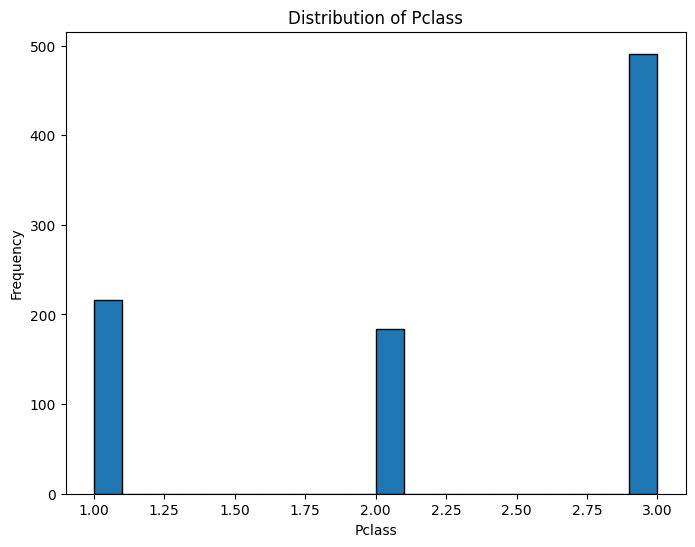

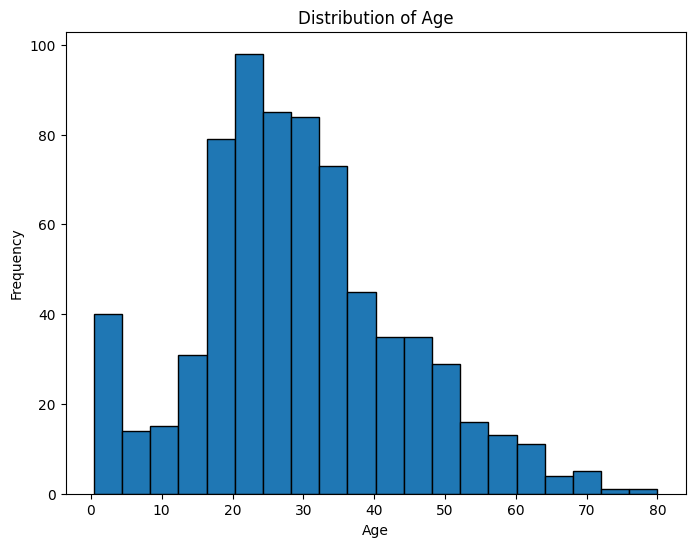

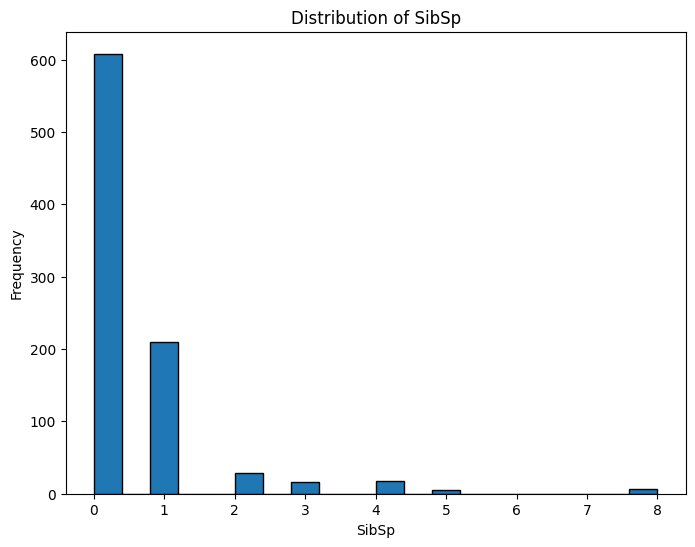

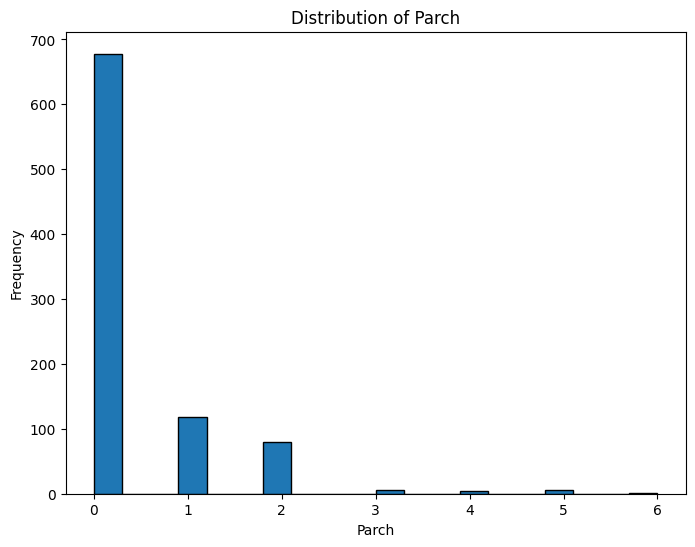

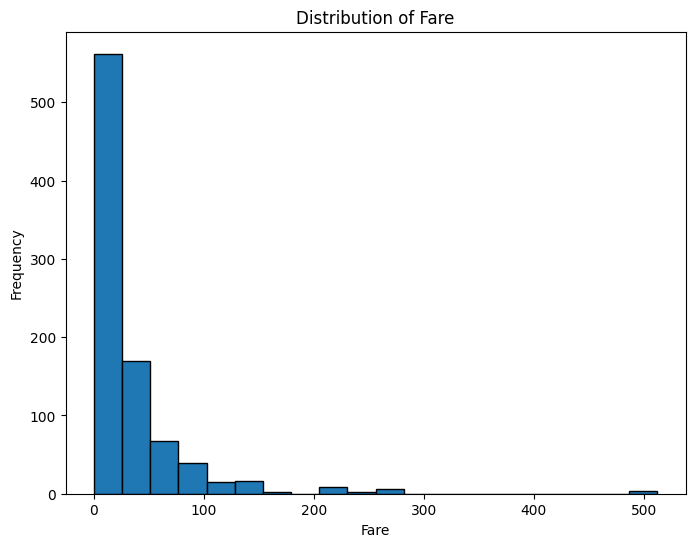

In [17]:
#Visualization for each category
for column in data.columns:
    # Skip non-numerical columns if you only want numerical data
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(8, 6))  # Adjust figure size if needed
        plt.hist(data[column], bins=20, edgecolor='black')  # Create histogram with 20 bins
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

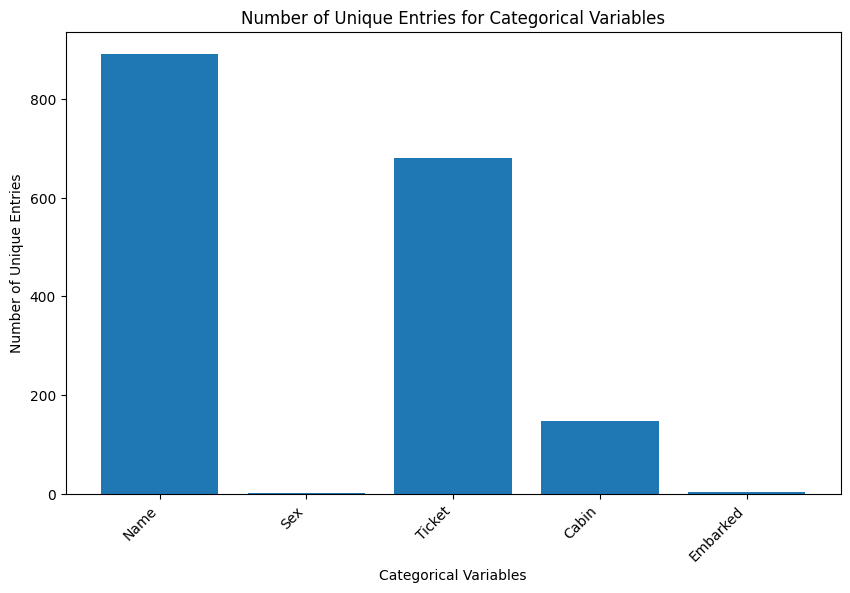


Top 5 Unique Entries and Counts for Name:
Name
Braund, Mr. Owen Harris             1
Boulos, Mr. Hanna                   1
Frolicher-Stehli, Mr. Maxmillian    1
Gilinski, Mr. Eliezer               1
Murdlin, Mr. Joseph                 1
Name: count, dtype: int64

Top 5 Unique Entries and Counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Top 5 Unique Entries and Counts for Ticket:
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: count, dtype: int64

Top 5 Unique Entries and Counts for Cabin:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: count, dtype: int64

Top 5 Unique Entries and Counts for Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [16]:
# Get categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Calculate unique entry counts for each categorical column
unique_counts = [data[col].nunique() for col in categorical_cols]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(categorical_cols, unique_counts)
plt.title('Number of Unique Entries for Categorical Variables')
plt.xlabel('Categorical Variables')
plt.ylabel('Number of Unique Entries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

for column in categorical_cols:
    top_5 = data[column].value_counts().head(5)
    print(f"\nTop 5 Unique Entries and Counts for {column}:")
    print(top_5)

**Important Notes:**

- 65% Males and 35% female

- major inconsistencies in recording of cabin and ticket number data, use a high degree of caution when working with these data sets.

- 72% of people boarded at Southampton, 19% left from Queenstown, and 9% left from Cherbourg


# --- Handling Outliers/Missing/duplicate Value ---

In the following session, please complete:

1.   Handling missing values for the column contains missing value and justify your choice with text
2.   Drop columns which is not relevant to the analysis/modeling (in this case, they are 'PassengerId', 'Name', 'SibSp', 'Parch' , 'Cabin' , 'Ticket')
3.   Drop duplicates
4.   Based on the visualizations, identify if there is any outliers with appropriate techniques, and then handling them properly. Please justify your choice with text.
5.   Again, use appropriate visulaization technique to visualize each column after handling the outliers/missing/duplicate data (excluding PassengerID)

In [18]:
# 1) For handling missing values in Age, Cabin and Embarked.

#For age I will fill with the mean, so it does not affect the distribution too much.
#I think this is better than the average for a slightly skewed gaussian distribution so that I will not drag the peak as much .
mean_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean_age)

#For Cabin I don't think it makes sense to replace any values. I will fill them as "Unknown". Filling them with any  real value will alter the data in a negative way.
#I could see this being used to determine if location in ship affects likelyhood of death. If this was the case filling with a central location
#or average value will not add anything positive to the data, but just skew the data incorrectly. Best to leave it alone or drop rows with "Unknown"
#when making models based on location
data['Cabin'] = data['Cabin'].fillna('Unknown')

#Embarked has as similar case to Cabin, I will fill with "Unknown". Alternatively I could've added a location based on the percentages shown and adding them randomly to
#missing data, but I would lose information on demographics from each location. Lets say Queenstown only had women. If I made 19% of the missing data from Queenstown
#then I might lose this insight. So I think it is best to leave it alone and make it Unknown, and drop rows for a temp table if I need to make a model based on Embarked.
data['Cabin'] = data['Embarked'].fillna('Unknown')

data.isna().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,False
SibSp,False
Parch,False
Ticket,False
Fare,False


In [19]:
# 2)Dropping listed columns
columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket']
data = data.drop(columns=columns_to_drop)



In [20]:
#2) check
data.isna().any()

,0
Survived,False
Pclass,False
Sex,False
Age,False
Fare,False
Embarked,True


In [21]:
#3) Drop Duplicates
data.drop_duplicates(inplace=True)

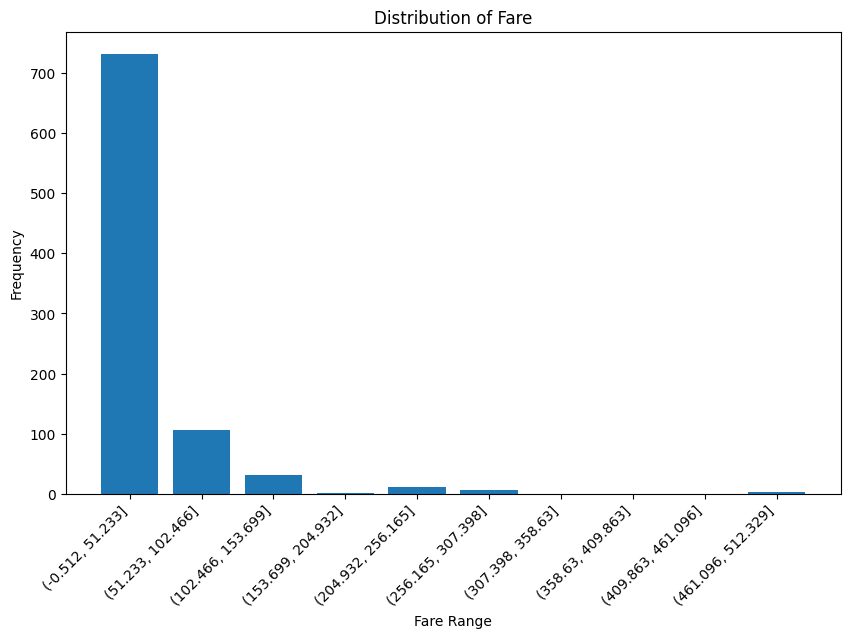

In [44]:
#Looking at data
#Based on earlier charts SibSp and Fare had the outliers, but we already dropped SibSP so we just need to fix "Fare"
import matplotlib.pyplot as plt
import pandas as pd
fare_bins = pd.cut(data['Fare'], bins=10)
fare_counts = fare_bins.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(fare_counts.index.astype(str), fare_counts.values)
plt.title('Distribution of Fare before cleaning')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:

#4 Deal with Outliers this uses Isolation forest. Looking at the removed values Im not sure why they were removed. I will use
#IQR to remove it for the final dataset
from sklearn.ensemble import IsolationForest
import pandas as pd

def remove_outliers_isolation_forest(data, contamination=0.05, exclude_columns=['Sex', 'Embarked']): # Removed 'Name', 'Ticket', 'Cabin'
    numerical_data = data.drop(columns=exclude_columns, errors='ignore').select_dtypes(include=['number']) # Added errors='ignore'
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(numerical_data)
    cleaned_data = data[outlier_labels == 1]
    data = data.reset_index(drop=True)
    removed_indices = data.index[outlier_labels == -1]
    removed_data = data.iloc[removed_indices]

    return cleaned_data, removed_data

cleaned_data, removed_data = remove_outliers_isolation_forest(data)

# Display the removed data
removed_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
27,0,1,male,19.0,263.0000,S
43,1,2,female,3.0,41.5792,C
53,0,1,male,65.0,61.9792,C
73,1,3,male,32.0,56.4958,S
84,1,1,female,23.0,263.0000,S


In [48]:
#4) Remove Outliers using Inter quartile range
def remove_outliers_iqr(data, columns):
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = 100

    # Filter data to keep only rows within the bounds for the current column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

  return data

columns_to_check = ['Fare']
data = remove_outliers_iqr(data, columns_to_check)

In [ ]:
# 5) Looking at data after cleaning
import matplotlib.pyplot as plt
import pandas as pd
fare_bins = pd.cut(data['Fare'], bins=10)
fare_counts = fare_bins.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(fare_counts.index.astype(str), fare_counts.values)
plt.title('Distribution of Fare after cleaning')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# --- Feature Engineering ---

In the following session, please complete:

1.   Perform necessary scaling and normalization, and justify your choice with text.
2.   Encode categorical features with appropriate techniques and justify your choice with text
3.   Create new features from existing features and justify your choice with text.

In [50]:
#1) I Use standard scale to normalize numerical data except survived which is a boolean

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns (excluding 'Survived' which is the target variable)
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'Survived']

# Create a copy of the DataFrame to avoid modifying the original data
scaled_data = data.copy()

# Scale numerical features using StandardScaler
scaler = StandardScaler()
scaled_data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the scaled/normalized data
print(scaled_data.head())

   PassengerId  Survived    Pclass  \
0    -1.709747         0  0.768445   
1    -1.705898         1 -1.756877   
2    -1.702050         1  0.768445   
3    -1.698201         1 -1.756877   
4    -1.694352         0  0.768445   

                                                Name     Sex       Age  \
0                            Braund, Mr. Owen Harris    male -0.519350   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.583244   
2                             Heikkinen, Miss. Laina  female -0.243702   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.376508   
4                           Allen, Mr. William Henry    male  0.376508   

      SibSp   Parch            Ticket      Fare Cabin Embarked  
0  0.434857 -0.4462         A/5 21171 -0.728422   NaN        S  
1  0.434857 -0.4462          PC 17599  2.347915   C85        C  
2 -0.460499 -0.4462  STON/O2. 3101282 -0.695993   NaN        S  
3  0.434857 -0.4462            113803  1.474339  C123        S  
4

In [51]:
#2) Encode categorical variables
# I think that the most likely columns to use for analysis would be embarked and cabin
# these can be coded into categoricla variables

###First i used one hot encoding for the Embarked
# Create a mapping dictionary for Embarked values
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}

# Replace Embarked values with numerical values using the mapping
scaled_data['Embarked'] = scaled_data['Embarked'].map(embarked_mapping)

# One-hot encode the Embarked column
embarked_encoded = pd.get_dummies(scaled_data['Embarked'], prefix='Embarked')

# Concatenate the one-hot encoded columns to the DataFrame
scaled_data = pd.concat([scaled_data, embarked_encoded], axis=1)

# Drop the original Embarked column
scaled_data.drop('Embarked', axis=1, inplace=True)

# Display a preview of the changed DataFrame
print(scaled_data.head())

   PassengerId  Survived    Pclass  \
0    -1.709747         0  0.768445   
1    -1.705898         1 -1.756877   
2    -1.702050         1  0.768445   
3    -1.698201         1 -1.756877   
4    -1.694352         0  0.768445   

                                                Name     Sex       Age  \
0                            Braund, Mr. Owen Harris    male -0.519350   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.583244   
2                             Heikkinen, Miss. Laina  female -0.243702   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.376508   
4                           Allen, Mr. William Henry    male  0.376508   

      SibSp   Parch            Ticket      Fare Cabin  Embarked_1.0  \
0  0.434857 -0.4462         A/5 21171 -0.728422   NaN         False   
1  0.434857 -0.4462          PC 17599  2.347915   C85          True   
2 -0.460499 -0.4462  STON/O2. 3101282 -0.695993   NaN         False   
3  0.434857 -0.4462            113803  1.4

In [56]:
#4 and 5) Creating a dummy column for floor and fixing the cabin room number, making it just numbers and ensuring no duplicates

# Function to extract the first cabin if multiple cabins are listed
def extract_first_cabin(cabin):
    if isinstance(cabin, str):  # Check if cabin is a string (not NaN)
        return cabin.split()[0]  # Split by space and take the first element
    else:
        return cabin  # Return as is if NaN

# Apply the function to the Cabin column
scaled_data['Cabin'] = scaled_data['Cabin'].apply(extract_first_cabin)

# Create a mapping for cabin letters to floor numbers
cabin_floor_mapping = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8  # Assuming 'T' is another floor
}

# Extract floor number and create a new column
scaled_data['Floor'] = scaled_data['Cabin'].str[0].map(cabin_floor_mapping).fillna(0).astype(int)  # Handle NaN with 0 and convert to int

# Extract the first set of numbers from the Cabin column and update the Cabin column
scaled_data['Cabin'] = scaled_data['Cabin'].str.extract('(\d+)').fillna(0).astype(int)



AttributeError: Can only use .str accessor with string values!

In [58]:
# ----> Replace 0 with 'N/A' in 'Cabin' and 'Floor' columns <----
scaled_data['Cabin'] = scaled_data['Cabin'].replace(0, 'N/A')
scaled_data['Floor'] = scaled_data['Floor'].replace(0, 'N/A')
# Display the first 30 entries of Cabin and Floor columns
print(scaled_data[['Cabin', 'Floor']].head(30))

   Cabin Floor
0    N/A   N/A
1     85     3
2    N/A   N/A
3    123     3
4    N/A   N/A
5    N/A   N/A
6     46     5
7    N/A   N/A
8    N/A   N/A
9    N/A   N/A
10     6     7
11   103     3
12   N/A   N/A
13   N/A   N/A
14   N/A   N/A
15   N/A   N/A
16   N/A   N/A
17   N/A   N/A
18   N/A   N/A
19   N/A   N/A
20   N/A   N/A
21    56     4
22   N/A   N/A
23     6     1
24   N/A   N/A
25   N/A   N/A
26   N/A   N/A
28   N/A   N/A
29   N/A   N/A
30   N/A   N/A
